# Emotion and Memory
### Matthew Chong A16156411
### Daneil Byers A15396367
### Steve Kuk
### Robert Aispuro

# I. Introduction and Background

### IA. Overview

For our project, we wanted to analyze data on individuals ability to comprehend and recall information and see if their ability to execute these task are influenced by positive/negative sentiment. We decided to split the data between age groups and divided them into 3 buckets: 18-25, 30-40, 45-55 as well as splitting the data between 3 columns: recalled, imagined and retold.  We focused on specific columns of information from the dataset  such as age, draining, distracted similarity, etc, that can potentially influence one’s ability to comprehend and recall information.  We took an approach using these variables to simultaneously analyze memory recollection as well as sentiment for individuals.

### IB. Research Question

 Does Positive and Negative emotion influence memory(or academic performance) when isolated regardless of environment and regardless of gender?



### IC. Background & Prior Work

#Include explanation of what work has been done previously
#Include citations or links to previous work
#Include an explanation of dataset(s) used (i.e., how the data was collected, features/variables included, number of observations, information in dataset)



Over the past years, student's academic performance have been largly influenced by the pandemic where in-person classes transitioned into online classes. This sudden change either hada positive or negative academic impact, depending on the prefered learning method on the individual. In the research article, "Integrating students' Perspective about Online Learning: A hierarchy of factors" by Montgomery Van Wart, they found that the most critical factor of online classes is the "loss of phsyical interaction". The loss of physical interaction inturns demands higher level of interactivity and instructional sophistication. Furthermore, how students personally feel about the sudden shift in learning may have an influence in their ability to comprehend and recall information delivered through their computers. The research article, "Impact of online classes on the satisfaction and performance of students during the pandemic period of COVID-19" by Ram Gopal, looks at this factor. The study evaluated student's thoughts about how they personally felt about online learning. The found that "overall students agreed that online teaching was valuable for them". From this article, it seems that students are satisfied with online learning. Building off of this , in the article, "The Influence of Virtual Learning Environments in Students' performance" by Paul Alves, they found that the more access a student has to VLE (Virtual Learning Environments), leads to an increase of the number of units they register, an increase in the number of units they pass, and a decrease in the "percentage of students who failed all course units". Thus, not only are students satisfied with online learning, they are also overall better performing in term s of academics. From these articles, we have a general idea that student's emotions (positive or negative) does in fact play a role in their academic performance.  Traditionally, a students learning and education has always been delivered in person. Now, students are abruptly forced to adapt to a new learning environment where their education is being delivered through a monitor screen.


From our own group's experience we have noticed that it has gotten increasingly difficult to direct our attention and retain knowledge given in class. As a result of this we are motivated in finding the factors that influence attention. We want to uncover if positive,negative or neutral emotions contributes to one's ability to focus, retain meory and perform cognitive tasks. More in-depth, we are interested in measuring the difference of cognitive performance when one's emotion is changed, as knowing the optimal methods to obtain and retain information is univerally crucial for all students to know. As a result we believe that it is crucial to find the most productive way to retain academic knowledge so that we can better assist fellow students during these unusual times.
- https://educationaltechnologyjournal.springeropen.com/articles/10.1186/s41239-020-00229-8
- https://link.springer.com/article/10.1007/s10639-021-10523-1
- https://www.semanticscholar.org/paper/The-Influence-of-Virtual-Learning-Environments-in-Alves-Miranda/a7c7ba6194633bd68a300522089c795fb4c83a79

### ID. Hypothesis

If an individual is infected with positive emotion then their ability comprehend and recall information is enhanced. Likewise, if an individual is infected with negative emotions then their ability to comprehend information is imperiled. Positive emotion is supllemental to learning and memory recollection because we believe postiive sentiment influences motivation as well as focus which are two essential factors in memory. Negative emotion is detrimental to learning and memory recollection because haveing a negative mindset in the context of a learning environment restricts one's ability to reacall and comprehend new information.

# II. Data Analysis

### IIA. Set Up

In [1]:
#Installations required

#python -m spacy download en_core_web_lg
#pip install spacy
#pip install vaderSentiment

In [2]:
#Import packages
from lisc import Counts
from lisc.utils.db import SCDB
from lisc.plts.counts import *
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import spacy

#Data Import
hippDf = pd.read_csv('hippoCorpusV2.csv')
islandersDf = pd.read_csv('Islander_data.csv')

### IIB. Data Wrangling


Going to focus on these columns and check for null values:
- annotatorAge: Lower limit of the age bucket of the worker.
  Buckets are: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54,55+
  
- story: Story about the imagined or recalled event (15-25     sentences)
- distracted: How distracted were you while writing your story? (5-point Likert)

- draining: How taxing/draining was writing for you emotionally? (5-point Likert)

- frequency: How often do you think about or talk about this event? (5-point Likert)

- importance: How impactful, important, or personal is this story/event to you? (5-point Likert)

- logTimeSinceEvent: Log of time (days) since the recalled event happened

- mainEvent: Short phrase describing the main event described

- similarity: How similar to your life does this event/story feel to you? (5-point Likert)

- stressful: How stressful was this writing task? (5-point Likert)

- summary: Summary of the events in the story (1-3 sentences)

- timeSinceEvent: Time (number of days) since the recalled event happened

In [3]:
#Check for null values, if null value found returns True
print('AnnotatorAge null values ... ',hippDf['annotatorAge'].isnull().values.any())
print('Story null values ...        ',hippDf['story'].isnull().values.any())
print('Distracted null values ...   ', hippDf['distracted'].isnull().values.any())
print('Draining null values ...     ', hippDf['draining'].isnull().values.any())
print('Frequency null values ...    ', hippDf['frequency'].isnull().values.any())
print('Importance null values ...   ', hippDf['importance'].isnull().values.any())
print('LTSinceEvent null values ... ', hippDf['logTimeSinceEvent'].isnull().values.any())
print('Similarity null values ...   ', hippDf['similarity'].isnull().values.any())
print('Stressful null values ...    ', hippDf['stressful'].isnull().values.any())
print('TimeSinceEvent null values ..', hippDf['timeSinceEvent'].isnull().values.any())


AnnotatorAge null values ...  True
Story null values ...         False
Distracted null values ...    False
Draining null values ...      False
Frequency null values ...     True
Importance null values ...    True
LTSinceEvent null values ...  False
Similarity null values ...    True
Stressful null values ...     False
TimeSinceEvent null values .. False


As we can see there are some null values which is expected based on the dataset the was provided. Since we are interested in the age of the indivduals and their emotion we are going to drop any row with a NaN value in the AnnotatorAge column and importance column

In [4]:
noNaNHippDf = hippDf.dropna(subset=['annotatorAge','importance',])



In [5]:
noNaNHippDf.shape

(6687, 23)

Ensuring that there are no more NaN values

In [6]:
noNaNHippDf['annotatorAge'].unique()

array([25., 35., 30., 18., 50., 40., 45., 55.])


From this, we can see that there are 8 unique age variables. For this project, we will classify the age bucket 18 and 25 as **'Youth'**, 30,35,40 as **'Adults'**, and 45,50,55 as **'Seniors'** into a new column called **"AgeGroup"**

In [7]:
#Categorizes annotatorAge into different age groups
def ageGroup(row):
    if row['annotatorAge'] == 18 or row['annotatorAge'] == 25:
        return 'Youth'
    elif row['annotatorAge'] == 30 or row['annotatorAge'] == 35 or row['annotatorAge'] == 40:
        return 'Adult'
    elif row['annotatorAge'] == 45 or row['annotatorAge'] == 50 or row['annotatorAge'] == 55:
        return 'Senior'
    else:
        return None

In [8]:
ageKey = noNaNHippDf.apply(lambda row: ageGroup(row),axis=1)
ageKey

0        Youth
1        Youth
2        Adult
3        Adult
4        Youth
         ...  
6849     Adult
6850     Youth
6851     Adult
6852     Adult
6853    Senior
Length: 6687, dtype: object

In [9]:
noNaNHippDf['AgeGroup'] = ageKey


/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/2312913534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNaNHippDf['AgeGroup'] = ageKey


In [10]:
noNaNHippDf['AgeGroup'].unique()

array(['Youth', 'Adult', 'Senior'], dtype=object)

#### Splitting data by group
Splitting the data with the memType column with **"recalled"**,**"imagined"**, and **"retold"**

In [11]:
recalled_df = noNaNHippDf[noNaNHippDf['memType']=="recalled"]
imagined_df = noNaNHippDf[noNaNHippDf['memType']=="imagined"]
retold_df = noNaNHippDf[noNaNHippDf['memType']=="retold"]


Going to focus on these columns:
- annotatorAge: Lower limit of the age bucket of the worker.
  Buckets are: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54,55+
  
- story: Story about the imagined or recalled event (15-25     sentences)
- distracted: How distracted were you while writing your story? (5-point Likert)

- draining: How taxing/draining was writing for you emotionally? (5-point Likert)

- frequency: How often do you think about or talk about this event? (5-point Likert)

- importance: How impactful, important, or personal is this story/event to you? (5-point Likert)

- logTimeSinceEvent: Log of time (days) since the recalled event happened

- mainEvent: Short phrase describing the main event described

- similarity: How similar to your life does this event/story feel to you? (5-point Likert)

- stressful: How stressful was this writing task? (5-point Likert)

- summary: Summary of the events in the story (1-3 sentences)

- timeSinceEvent: Time (number of days) since the recalled event happened

- recAgnPairId: ID of the recalled story that corresponds to this retold story (null for imagined stories). Group on   this variable to get the recalled-retold pairs.


In [12]:
newRecalled = recalled_df[['annotatorAge','story','distracted','draining','frequency',
                                         'importance','logTimeSinceEvent','mainEvent','similarity',
                                         'stressful','summary','timeSinceEvent','AgeGroup','recAgnPairId','memType']]
newImagined = imagined_df[['annotatorAge','story','distracted','draining','frequency',
                                         'importance','logTimeSinceEvent','mainEvent','similarity',
                                         'stressful','summary','timeSinceEvent','AgeGroup','recAgnPairId','memType']]
newRetold = retold_df[['annotatorAge','story','distracted','draining','frequency',
                                         'importance','logTimeSinceEvent','mainEvent','similarity',
                                         'stressful','summary','timeSinceEvent','AgeGroup','recAgnPairId','memType']]

Performing text comparison
We are going to look at how similar the stories are between recalled and retold using the spacy package. As a reminder the recalled group is recalling a previous story from their life and the retold group is trying to retell the same story they gave previously based on the summary that they created after they told their start in the recalled group


##### We are going to make a new table that combines the recalled story and the retold story so that we can more easily apply the spacy package to it

Need to find the unique id's that link the two data sections together

In [13]:
idTags = noNaNHippDf['recAgnPairId'].unique()
#Need to remove the null tag
indexOfNull = 0
newIdTags = np.delete(idTags,indexOfNull)
newIdTags

array(['304SM51WA4QG34IRAVFYVE1S8XNSBV', '304SM51WA4QG34IRAVFYVE1SAOBSB3',
       '308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ', ...,
       '3ZV9H2YQQET47QVNF7ATAK61QT9W3C', '3ZV9H2YQQET47QVNF7ATAK61TBE3WR',
       '3ZY8KE4ISKPJZ21KN8HT1QGYU5NQVO'], dtype=object)

Now that we have all the unique tags we need to find the recalled data and merge it with the retold data

In [14]:
listOfLists = []
secondKeyStory = []
deltaOfTime = []
for tagNumber in range(len(newIdTags)):
    #Get df of unique tag
    tagIds = hippDf[hippDf['recAgnPairId'] == newIdTags[tagNumber]]
    #Grab the first one and add it to the list
    mainVal = tagIds.iloc[0]
    #Take the story of the second
    secondStory = tagIds['story'].iloc[1]
    #Check that the data works right
    timeSinceRe = tagIds['timeSinceEvent'].iloc[1]
    
    
    #Add them to a list to make a DF out of
    listOfLists.append(mainVal)
    secondKeyStory.append(secondStory)
    deltaOfTime.append(timeSinceRe)
    
    
    

In [15]:
recalledAndRetold = pd.DataFrame(listOfLists)
recalledAndRetold['retold stories'] = secondKeyStory
recalledAndRetold['time since recalled'] = deltaOfTime
recalledAndRetold.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled
9,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,304SM51WA4QG34IRAVFYVE1S8XNSBV,NaN,NaN,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,3.000000e+01
12,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,304SM51WA4QG34IRAVFYVE1SAOBSB3,NaN,NaN,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,1.400000e+01
18,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ,NaN,NaN,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.000000e+00
21,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060FETEI96,NaN,NaN,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.000000e+00
26,3OJSZ2ATDTISVQHQLIQAX154MTN576,612,3MFQXXSF,30.0,man,white,1.0,1.0,5.0,5.0,...,308XBLVESJQ42PIEV6FT54WWN37BRA,NaN,NaN,NaN,About seven and a half months ago I found out ...,1.0,I found out I am going to be a father. My wif...,240.0,The biggest thing to happen to me is finding o...,6.666667e+29


As we can see in row 26 the data in the time since recalled column makes no sense. After doing further investigation this error orginates from how the data was recorded. So to avoid skewed results we are going to remove any result that is above 1111111 days. We chose this point from looking at the data and seeing that it jumps from 780 days to 
1111111 which is a jump from 2.14 years to 3,044 years.

In [16]:
cleanedRecalledAndRetold = recalledAndRetold[recalledAndRetold['time since recalled'] < 1111111]
cleanedRecalledAndRetold.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled
9,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,304SM51WA4QG34IRAVFYVE1S8XNSBV,NaN,NaN,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,30.0
12,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,304SM51WA4QG34IRAVFYVE1SAOBSB3,NaN,NaN,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,14.0
18,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ,NaN,NaN,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.0
21,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060FETEI96,NaN,NaN,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.0
31,324G5B4FB4UT0JVPOCKYG69D7A807S,1834,AKT7XTAI,45.0,man,black,2.0,2.0,5.0,5.0,...,308XBLVESJQ42PIEV6FT54WWPO4RBV,NaN,NaN,NaN,"I fell down a flight of stairs in my home, in ...",2.0,I fell down the stairs in my home and suffered...,240.0,"Last May, I had just come upstairs to get rea...",120.0


Lets check and make sure that there are no more extraneous data points

In [17]:
cleanedRecalledAndRetold['time since recalled'].unique()

array([ 30.,  14.,   7., 120.,  60.,  90., 150.,  42.,  56.,  35.,  21.,
       360.,  28.,  49., 510., 180., 720., 780., 300., 390., 126., 450.,
       240., 420.,  98.,  63.,  70.,  84., 330., 154., 270., 600., 112.,
        77., 210., 750.])

### IIC. Data Analysis and Results
- **Sentiment Analysis**
- **Spacy similarity**

Lets run our **setiment analysis** first
This is the method that will be used to calculate the sentiment score

In [18]:
def sentScore(dataFrame):
    s_score = []
    s_rating = []
    sentiment_obj = SentimentIntensityAnalyzer()
    for i in range(len(dataFrame)):
        s_score.append(sentiment_obj.polarity_scores(dataFrame.iloc[i,1]))
        comp_score = s_score[i]['compound']
        if comp_score > 0.05:
            s_rating.append("Positive")
        elif comp_score <= -0.05:
            s_rating.append("Negative")
        else:
            s_rating.append("Neutral")
    return [s_score, s_rating]

Sentiment Analysis For Recalled

In [19]:
newRecalled.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId
1,25.0,"The day started perfectly, with a great drive ...",1.0,1.0,3.0,4.0,4.499810,a concert.,NaN,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN
3,30.0,"Five months ago, my niece and nephew were born...",1.0,4.0,3.0,5.0,5.010635,meeting my twin niece and nephew.,NaN,2.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN
5,35.0,Burning Man metamorphoses was perfect. I am de...,1.0,1.0,5.0,5.0,3.401197,about my journey this year to Burning Man meta...,NaN,1.0,It is always a journey for me to go to burning...,30.0,Adult,NaN
7,18.0,"Dear Diary,I would say this happened about 3 m...",1.0,4.0,5.0,5.0,4.499810,a bad driving experience on the way to Acadia ...,NaN,1.0,What happened is that I was on a trip with my ...,90.0,Youth,NaN
10,25.0,About a month ago me and my girlfriend went to...,1.0,1.0,2.0,3.0,3.401197,a trip to the zoo.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV


In [20]:
recalledSentValues = sentScore(newRecalled)

In [21]:
newRecalled['sentiment_score'] = recalledSentValues[0]
newRecalled['sentiment'] = recalledSentValues[1]


/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/1647381943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newRecalled['sentiment_score'] = recalledSentValues[0]
/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/1647381943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newRecalled['sentiment'] = recalledSentValues[1]


In [22]:
newRecalled.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,sentiment_score,sentiment
1,25.0,"The day started perfectly, with a great drive ...",1.0,1.0,3.0,4.0,4.499810,a concert.,NaN,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN,"{'neg': 0.03, 'neu': 0.704, 'pos': 0.266, 'com...",Positive
3,30.0,"Five months ago, my niece and nephew were born...",1.0,4.0,3.0,5.0,5.010635,meeting my twin niece and nephew.,NaN,2.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN,"{'neg': 0.041, 'neu': 0.794, 'pos': 0.165, 'co...",Positive
5,35.0,Burning Man metamorphoses was perfect. I am de...,1.0,1.0,5.0,5.0,3.401197,about my journey this year to Burning Man meta...,NaN,1.0,It is always a journey for me to go to burning...,30.0,Adult,NaN,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.122, 'co...",Positive
7,18.0,"Dear Diary,I would say this happened about 3 m...",1.0,4.0,5.0,5.0,4.499810,a bad driving experience on the way to Acadia ...,NaN,1.0,What happened is that I was on a trip with my ...,90.0,Youth,NaN,"{'neg': 0.065, 'neu': 0.856, 'pos': 0.079, 'co...",Positive
10,25.0,About a month ago me and my girlfriend went to...,1.0,1.0,2.0,3.0,3.401197,a trip to the zoo.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV,"{'neg': 0.009, 'neu': 0.883, 'pos': 0.108, 'co...",Positive


In [23]:
newRecalled.recAgnPairId.notnull().sum()

1304

Sentiment Analysis For Imagined

In [24]:
newImagined.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId
0,25.0,"Concerts are my most favorite thing, and my bo...",1.0,1.0,NaN,3.0,4.499810,attending a show,3.0,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN
2,35.0,It seems just like yesterday but today makes f...,1.0,1.0,NaN,4.0,5.010635,my sister having her twins a little early,3.0,1.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN
4,25.0,About a month ago I went to burning man. I was...,2.0,2.0,NaN,3.0,3.401197,the consequences of going to burning man,4.0,4.0,It is always a journey for me to go to burning...,30.0,Youth,NaN
6,35.0,"Play stupid games, win stupid prizes road trip...",3.0,1.0,NaN,4.0,4.499810,a scary car ride where we swerved on our way t...,1.0,2.0,What happened is that I was on a trip with my ...,90.0,Adult,NaN
8,25.0,I wanted to write about one of the best days i...,1.0,1.0,NaN,4.0,3.401197,my girlfriend and I going to the zoo.,4.0,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,NaN


In [25]:
imaginedSentValues = sentScore(newImagined)
newImagined['sentiment_score'] = imaginedSentValues[0]
newImagined['sentiment'] = imaginedSentValues[1]
newImagined.head()

/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/228504564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newImagined['sentiment_score'] = imaginedSentValues[0]
/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/228504564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newImagined['sentiment'] = imaginedSentValues[1]


,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,sentiment_score,sentiment
0,25.0,"Concerts are my most favorite thing, and my bo...",1.0,1.0,NaN,3.0,4.499810,attending a show,3.0,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN,"{'neg': 0.011, 'neu': 0.714, 'pos': 0.274, 'co...",Positive
2,35.0,It seems just like yesterday but today makes f...,1.0,1.0,NaN,4.0,5.010635,my sister having her twins a little early,3.0,1.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN,"{'neg': 0.023, 'neu': 0.826, 'pos': 0.151, 'co...",Positive
4,25.0,About a month ago I went to burning man. I was...,2.0,2.0,NaN,3.0,3.401197,the consequences of going to burning man,4.0,4.0,It is always a journey for me to go to burning...,30.0,Youth,NaN,"{'neg': 0.052, 'neu': 0.872, 'pos': 0.076, 'co...",Positive
6,35.0,"Play stupid games, win stupid prizes road trip...",3.0,1.0,NaN,4.0,4.499810,a scary car ride where we swerved on our way t...,1.0,2.0,What happened is that I was on a trip with my ...,90.0,Adult,NaN,"{'neg': 0.099, 'neu': 0.828, 'pos': 0.073, 'co...",Negative
8,25.0,I wanted to write about one of the best days i...,1.0,1.0,NaN,4.0,3.401197,my girlfriend and I going to the zoo.,4.0,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,NaN,"{'neg': 0.008, 'neu': 0.841, 'pos': 0.151, 'co...",Positive


Sentiment Analysis For Retold

In [26]:
newRetold

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId
9,25.0,Me and my girlfriend had gone to the Los Angel...,1.0,1.0,2.0,2.0,5.347108,a trip to the Los Angeles zoo with my girlfriend.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV
12,30.0,My Cousin's WeddingWe went to my cousin’s wedd...,3.0,4.0,3.0,3.0,5.192957,my cousin's wedding,NaN,4.0,My life was endangered for doing research on p...,180.0,Adult,304SM51WA4QG34IRAVFYVE1SAOBSB3
18,30.0,I remember the event like it was just yesterda...,4.0,4.0,4.0,4.0,4.094345,my friend's arrest,NaN,3.0,There was an arrest. I bailed out my friend. I...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ
21,30.0,"When my now four year old son was born, we wer...",1.0,1.0,4.0,4.0,4.094345,my son's foot surgery,NaN,1.0,My four year old son needed foot surgery. My h...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060FETEI96
26,30.0,About seven and a half months ago I found out ...,1.0,1.0,5.0,5.0,5.480639,Finding out I am going to be a father.,NaN,1.0,I found out I am going to be a father. My wif...,240.0,Adult,308XBLVESJQ42PIEV6FT54WWN37BRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6725,55.0,Another of my little birds have left the nest....,1.0,2.0,4.0,4.0,4.094345,training my coworker to her new store manager ...,NaN,1.0,My trainee was finally promoted to manager aft...,60.0,Senior,NaN
6726,25.0,Earlier this year there was a domestic violenc...,1.0,5.0,5.0,5.0,5.598422,me being involved in a domestic violence incident,NaN,4.0,"Got in a verbal argument with wife, which led ...",270.0,Youth,NaN
6727,25.0,I remember a time when i was going to my mothe...,3.0,4.0,4.0,3.0,2.639057,brother getting engaged,NaN,4.0,{},14.0,Youth,NaN
6728,18.0,When I graduated high I was initially very hap...,4.0,3.0,4.0,4.0,5.010635,about graduating high shcool,NaN,2.0,I graduated high school. After that I realized...,150.0,Youth,NaN


In [27]:
retoldSentValues = sentScore(newRetold)
newRetold['sentiment_score'] = retoldSentValues[0]
newRetold['sentiment'] = retoldSentValues[1]
newRetold.head()

/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/4011508452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newRetold['sentiment_score'] = retoldSentValues[0]
/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/4011508452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newRetold['sentiment'] = retoldSentValues[1]


,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,sentiment_score,sentiment
9,25.0,Me and my girlfriend had gone to the Los Angel...,1.0,1.0,2.0,2.0,5.347108,a trip to the Los Angeles zoo with my girlfriend.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV,"{'neg': 0.033, 'neu': 0.923, 'pos': 0.044, 'co...",Positive
12,30.0,My Cousin's WeddingWe went to my cousin’s wedd...,3.0,4.0,3.0,3.0,5.192957,my cousin's wedding,NaN,4.0,My life was endangered for doing research on p...,180.0,Adult,304SM51WA4QG34IRAVFYVE1SAOBSB3,"{'neg': 0.062, 'neu': 0.853, 'pos': 0.085, 'co...",Positive
18,30.0,I remember the event like it was just yesterda...,4.0,4.0,4.0,4.0,4.094345,my friend's arrest,NaN,3.0,There was an arrest. I bailed out my friend. I...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ,"{'neg': 0.063, 'neu': 0.702, 'pos': 0.234, 'co...",Positive
21,30.0,"When my now four year old son was born, we wer...",1.0,1.0,4.0,4.0,4.094345,my son's foot surgery,NaN,1.0,My four year old son needed foot surgery. My h...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060FETEI96,"{'neg': 0.05, 'neu': 0.873, 'pos': 0.077, 'com...",Positive
26,30.0,About seven and a half months ago I found out ...,1.0,1.0,5.0,5.0,5.480639,Finding out I am going to be a father.,NaN,1.0,I found out I am going to be a father. My wif...,240.0,Adult,308XBLVESJQ42PIEV6FT54WWN37BRA,"{'neg': 0.009, 'neu': 0.88, 'pos': 0.112, 'com...",Positive


In [28]:
newRetold.recAgnPairId.notnull().sum()

1304

Now that we have finished the sentimental analysis, we will now run the **Spacy similarity** analysis. We are going to use their english large package for vectorization because all the stories that were told range drastically. By using the large package we will be able to better vectorize our data with cosin similarity. Additionaly the retold group retells their story that they gave during their time in the recalled group given a summary that they created at the end of their recalled observation. So we are going to make a new dataset that only focus on the subjects that were in the **recalled** and **retold** groups. This will allow for us to observe a change, if any, in their story telling over a random time period

In [29]:
cleanedRecalledAndRetold.recAgnPairId.notnull().sum()

1095

In [30]:
nlp = spacy.load('en_core_web_lg')

In [31]:
test1 = cleanedRecalledAndRetold['story'].iloc[0]
test2 = cleanedRecalledAndRetold['retold stories'].iloc[0]
doc1 = nlp(test1)
doc2 = nlp(test2)


In [32]:
print(doc1.similarity(doc2))

0.9935622763567541


This function compares the similarity between the recalled story and the retold story

In [33]:
def applyingSpacy(df):
    sim_score = []
    
    for i in range(len(df)):
        ogStory = df['story'].iloc[i]
        newStory = df['retold stories'].iloc[i]
        nlpComp1 = nlp(ogStory)
        nlpComp2 = nlp(newStory)
        sim_score.append(nlpComp1.similarity(nlpComp2))
        
    return sim_score

In [34]:
sim_scores = applyingSpacy(cleanedRecalledAndRetold)

Lets double check that all the stories were processed

In [35]:
print(cleanedRecalledAndRetold.shape)
print(len(sim_scores))

(1095, 25)
1095


Since all the stories were processed lets add it back into the dataframe

In [36]:
cleanedRecalledAndRetold['spacy_sim'] = sim_scores
cleanedRecalledAndRetold.head()

/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/1405917381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedRecalledAndRetold['spacy_sim'] = sim_scores


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled,spacy_sim
9,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,30.0,0.993562
12,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,NaN,NaN,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,14.0,0.971579
18,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.0,0.983846
21,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,NaN,NaN,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.0,0.994450
31,324G5B4FB4UT0JVPOCKYG69D7A807S,1834,AKT7XTAI,45.0,man,black,2.0,2.0,5.0,5.0,...,NaN,NaN,NaN,"I fell down a flight of stairs in my home, in ...",2.0,I fell down the stairs in my home and suffered...,240.0,"Last May, I had just come upstairs to get rea...",120.0,0.993332


Lets readd the age group to the dataframe so when we visualize we can see the differences in the age groups

In [37]:
ageKey = cleanedRecalledAndRetold.apply(lambda row: ageGroup(row),axis=1)


In [38]:
cleanedRecalledAndRetold['AgeGroup'] = ageKey

/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/3990097904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedRecalledAndRetold['AgeGroup'] = ageKey


Lets plot our results from Spacy and see what we get


<AxesSubplot:xlabel='time since recalled', ylabel='spacy_sim'>

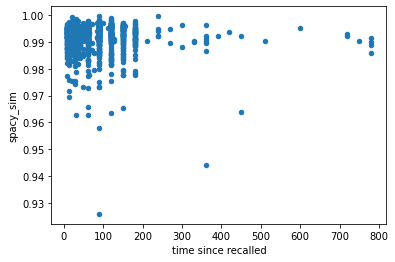

In [39]:
cleanedRecalledAndRetold.plot.scatter(x='time since recalled', y = 'spacy_sim')

These results seem to be fairly high so lets dive deeper in to why that might be
- Spacy documentation states that when taking the similarity of a document it defaults to the average of the token vectors. An example they state is, "“fast food” is the average of the vectors for “fast” and “food”, which isn’t necessarily representative of the phrase “fast food”"
- Therefore it could be the words are similar but the idea is not


Lets dig a little deeper to try and see why these high overally high scores may be occuring. The first thing that comes to mind is if the storys are differnt lengths. 

Lets create an example and see what the results are when the sentences are the same and the same length, the same but one has an extra sentence related to the previous, the same sentences but one has an extra sentence not related to the previousand the same idea with one having an extra sentence

In [40]:
#Exact same sentences
doc1 = nlp("I like burgers and dogs.")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. <-> I like burgers and dogs. 1.0


In [41]:
#Compared to raw sentence comparison
numberOfSimilarWords = 5
totalWords = 5
print("Raw comparison", numberOfSimilarWords / totalWords)

Raw comparison 1.0


In [42]:
#Same setences but one has an extra sentence that does relate to the previous
doc1 = nlp("I like burgers and dogs. I also like pineapples")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. I also like pineapples <-> I like burgers and dogs. 0.9651856966280024


In [43]:
#Compared to raw sentence comparison
numberOfSimilarWords = 5
totalWords = 9
print("Raw comparison", numberOfSimilarWords / totalWords)

Raw comparison 0.5555555555555556


In [44]:
#Same setences but one has an extra sentence that does not relate to the previous
doc1 = nlp("I like burgers and dogs. Bob flies planes")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. Bob flies planes <-> I like burgers and dogs. 0.9264174801721186


We can see that sentences that are irrelevant decrease the score, and sentences that are the similar decrease the score but not as much as an irrelevant extra sentence.

But what about an extra sentence that basically says the same thing as the previous but in a different way?

In [45]:
#Same setences but one has an extra sentence that repeats what is said but in a different way
doc1 = nlp("I like burgers and dogs. Burgers and dogs are what I like")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. Burgers and dogs are what I like <-> I like burgers and dogs. 0.9885780409078742


As we can see in the last sentence the similarity is the highest. With these examples we can more reasonably conclude that our results are in fact accurate for what we are trying to do. This is because we want to focus on how much the stories change not necessarily if the stories are talking about the same thing. Something that could be interesting for the future is to look into how much the length of an overall document can affect these scores. But for the sake of this project we are going to assume that the results are accurate

## Bringing it all Together
Lets compare the similarity score to the change in sentitment score. To do these we are going to take the sentiment score from the recalled group and subtract it from the retold group by individual

In [46]:
combinedAnalysis = cleanedRecalledAndRetold
combinedAnalysis["sentChange"] = np.nan
combinedAnalysis = combinedAnalysis.reset_index(drop=True)

/var/folders/wr/0q2rvryx0jn018lpjc485t9m0000gn/T/ipykernel_44553/2155567863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinedAnalysis["sentChange"] = np.nan


In [47]:
cRRKeys = cleanedRecalledAndRetold.recAgnPairId.unique()


Removing these keys as the recAgnPairId does not exist in the newRecalled or the newRetold dataframe

In [48]:
cRRKeys = np.delete(cRRKeys,95)
cRRKeys = np.delete(cRRKeys,611)
cRRKeys = np.delete(cRRKeys,797)
cRRKeys = np.delete(cRRKeys,881)
cRRKeys = np.delete(cRRKeys,939)
cRRKeys = np.delete(cRRKeys,1032)
cRRKeys = np.delete(cRRKeys,1068)

In [69]:
numberToPullVal = 0
i=0
for tagNumber in range(len(cRRKeys)):
    #print(i)
    #i +=1
    recalledRow = newRecalled[newRecalled['recAgnPairId'] == cRRKeys[tagNumber]]
    retoldRow = newRetold[newRetold['recAgnPairId'] == cRRKeys[tagNumber]]

    #Pull the neg, neu, and pos from the column. Stored as a series and not a dict
    #Putting it into a list then pulling from it
    negArrReC = pd.DataFrame(recalledRow['sentiment_score'].tolist())['neg'].tolist()
    neuArrReC = pd.DataFrame(recalledRow['sentiment_score'].tolist())['neu'].tolist()
    posArrReC = pd.DataFrame(recalledRow['sentiment_score'].tolist())['pos'].tolist()

    negArrReT = pd.DataFrame(retoldRow['sentiment_score'].tolist())['neg'].tolist()
    neuArrReT = pd.DataFrame(retoldRow['sentiment_score'].tolist())['neu'].tolist()
    posArrReT = pd.DataFrame(retoldRow['sentiment_score'].tolist())['pos'].tolist()

    #Check the difference between values
    newNegVal = negArrReT[numberToPullVal] - negArrReC[numberToPullVal] 
    newPoVal  = posArrReT[numberToPullVal] - posArrReC[numberToPullVal] 

    if(newPoVal > newNegVal):
        combinedAnalysis.loc[combinedAnalysis.recAgnPairId == cRRKeys[tagNumber], 'sentChange'] = 'Pos'
    elif(newPoVal < newNegVal):
        combinedAnalysis.loc[combinedAnalysis.recAgnPairId == cRRKeys[tagNumber], 'sentChange'] = 'Neg'
    else:
        combinedAnalysis.loc[combinedAnalysis.recAgnPairId == cRRKeys[tagNumber], 'sentChange'] = 'Neu'

In [70]:
combinedAnalysis.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled,spacy_sim,AgeGroup,sentChange
0,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,30.0,0.993562,Youth,Neg
1,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,14.0,0.971579,Adult,Neg
2,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.0,0.983846,Adult,Pos
3,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.0,0.994450,Adult,Neg
4,324G5B4FB4UT0JVPOCKYG69D7A807S,1834,AKT7XTAI,45.0,man,black,2.0,2.0,5.0,5.0,...,NaN,"I fell down a flight of stairs in my home, in ...",2.0,I fell down the stairs in my home and suffered...,240.0,"Last May, I had just come upstairs to get rea...",120.0,0.993332,Senior,Pos


In [88]:
combinedAnalysis.columns

Index(['AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'retold stories', 'time since recalled', 'spacy_sim',
       'AgeGroup', 'sentChange'],
      dtype='object')

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

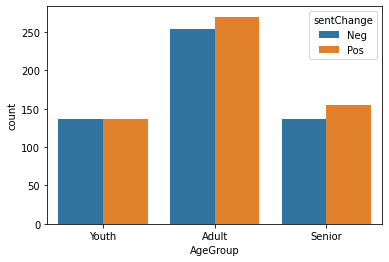

,distracted,draining,stressful
AgeGroup,,,
Adult,1.559398,2.337594,2.339850
Senior,1.432759,2.506897,2.475862
Youth,1.567442,2.303488,2.293023


<AxesSubplot:xlabel='AgeGroup', ylabel='stressful'>

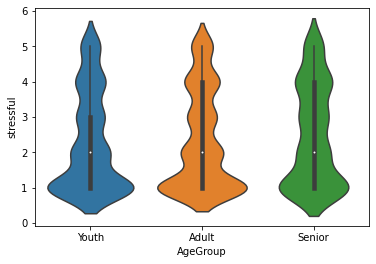

<AxesSubplot:xlabel='AgeGroup', ylabel='stressful'>

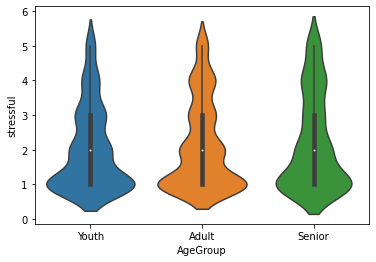

In [77]:
sns.violinplot(x='AgeGroup',data=newRetold,
            y='stressful')

<AxesSubplot:xlabel='AgeGroup', ylabel='draining'>

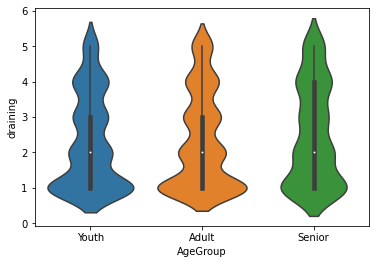

In [80]:
sns.violinplot(x='AgeGroup',data=newRecalled,
            y='draining')

<AxesSubplot:xlabel='AgeGroup', ylabel='draining'>

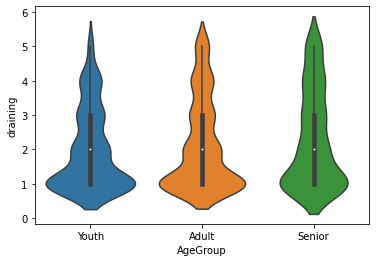

In [81]:
sns.violinplot(x='AgeGroup',data=newRetold,
            y='draining')

<AxesSubplot:xlabel='AgeGroup', ylabel='importance'>

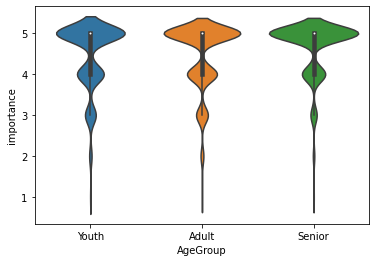

In [82]:
sns.violinplot(x='AgeGroup',data=newRecalled,
            y='importance')

<AxesSubplot:xlabel='AgeGroup', ylabel='importance'>

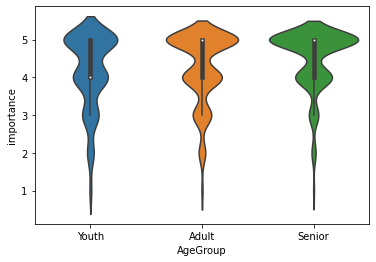

In [83]:
sns.violinplot(x='AgeGroup',data=newRetold,
            y='importance')

In [108]:
combinedAnalysis['memType']

0       retold
1       retold
2       retold
3       retold
4       retold
         ...  
1090    retold
1091    retold
1092    retold
1093    retold
1094    retold
Name: memType, Length: 1095, dtype: object

In [110]:
youthOnly = combinedAnalysis[combinedAnalysis['AgeGroup'] == 'Youth']
adultOnly = combinedAnalysis[combinedAnalysis['AgeGroup'] == 'Adult']
seniorOnly = combinedAnalysis[combinedAnalysis['AgeGroup'] == 'Senior']


### IID. Data Visualizations

Visualization for Recalled, Imagined and Retold by Sentiment and Age

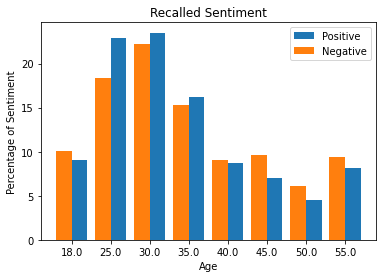

---------- Positive Stats ----------
Age: 18.0 Percentage: 9.019426456984274
Age: 25.0 Percentage: 22.849213691026826
Age: 30.0 Percentage: 23.496762257169287
Age: 35.0 Percentage: 16.23496762257169
Age: 40.0 Percentage: 8.741905642923218
Age: 45.0 Percentage: 7.030527289546716
Age: 50.0 Percentage: 4.4865864939870495
Age: 55.0 Percentage: 8.140610545790935
---------- Negative Stats ----------
Age: 18.0 Percentage: 10.084033613445378
Age: 25.0 Percentage: 18.319327731092436
Age: 30.0 Percentage: 22.18487394957983
Age: 35.0 Percentage: 15.294117647058824
Age: 40.0 Percentage: 9.07563025210084
Age: 45.0 Percentage: 9.57983193277311
Age: 50.0 Percentage: 6.050420168067227
Age: 55.0 Percentage: 9.411764705882353


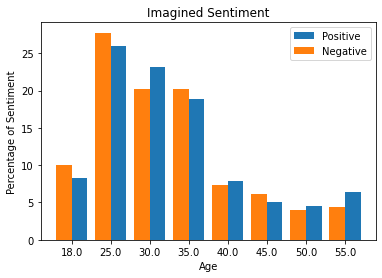

---------- Positive Stats ----------
Age: 18.0 Percentage: 8.32934418382001
Age: 25.0 Percentage: 25.94542843465773
Age: 30.0 Percentage: 23.12111057922451
Age: 35.0 Percentage: 18.81282910483485
Age: 40.0 Percentage: 7.850646242221158
Age: 45.0 Percentage: 5.026328386787937
Age: 50.0 Percentage: 4.547630445189086
Age: 55.0 Percentage: 6.366682623264721
---------- Negative Stats ----------
Age: 18.0 Percentage: 10.039370078740157
Age: 25.0 Percentage: 27.755905511811026
Age: 30.0 Percentage: 20.275590551181104
Age: 35.0 Percentage: 20.275590551181104
Age: 40.0 Percentage: 7.283464566929133
Age: 45.0 Percentage: 6.102362204724409
Age: 50.0 Percentage: 3.937007874015748
Age: 55.0 Percentage: 4.330708661417323


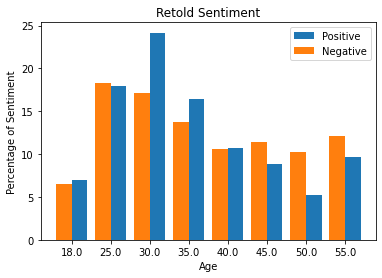

---------- Positive Stats ----------
Age: 18.0 Percentage: 6.999041227229147
Age: 25.0 Percentage: 17.929050814956852
Age: 30.0 Percentage: 24.161073825503358
Age: 35.0 Percentage: 16.39501438159156
Age: 40.0 Percentage: 10.738255033557047
Age: 45.0 Percentage: 8.820709491850431
Age: 50.0 Percentage: 5.273250239693192
Age: 55.0 Percentage: 9.683604985618409
---------- Negative Stats ----------
Age: 18.0 Percentage: 6.4638783269961975
Age: 25.0 Percentage: 18.250950570342205
Age: 30.0 Percentage: 17.110266159695815
Age: 35.0 Percentage: 13.688212927756654
Age: 40.0 Percentage: 10.646387832699618
Age: 45.0 Percentage: 11.406844106463879
Age: 50.0 Percentage: 10.26615969581749
Age: 55.0 Percentage: 12.167300380228136


In [148]:
#Recalled Visualization
X = newRecalled['annotatorAge'].unique()
X.sort()
x_axis = np.arange(len(newRecalled['annotatorAge'].unique()))


# Calculate Positive Amount and Percentages
positive = []
positive_total = 0
for x in X:
    value = len(newRecalled[(newRecalled['annotatorAge'] == x) & (newRecalled['sentiment'] == 'Positive')])
    positive.append(value)
    positive_total+=value

positive_percentage = []
for x in positive:
    positive_percentage.append((x/positive_total) * 100)


# Calculate Negative Amount and Percentages
negative = []
negative_total = 0
for x in X:
    value = len(newRecalled[(newRecalled['annotatorAge'] == x) & (newRecalled['sentiment'] == 'Negative')])
    negative.append(value)
    negative_total+=value

negative_percentage = []
for x in negative:
    negative_percentage.append((x/negative_total) * 100)

plt.xticks(x_axis, X)
plt.bar(x_axis + 0.2 ,positive_percentage,0.4,label='Positive')
plt.bar(x_axis - 0.2 ,negative_percentage,0.4,label='Negative')
plt.ylabel('Percentage of Sentiment')
plt.xlabel('Age')
plt.title('Recalled Sentiment')
plt.legend()
plt.show()

positive_stats = {}
negative_stats = {}
index = 0
for val in X:
    positive_stats[val] = positive_percentage[index]
    negative_stats[val] = negative_percentage[index]
    index+=1
print('---------- Positive Stats ----------')
for i in positive_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(positive_stats[i]))

print('---------- Negative Stats ----------')
for i in negative_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(negative_stats[i]))

#Imagined Visualization
X = newImagined['annotatorAge'].unique()
X.sort()
x_axis = np.arange(len(newImagined['annotatorAge'].unique()))


# Calculate Positive Amount and Percentages
positive = []
positive_total = 0
for x in X:
    value = len(newImagined[(newImagined['annotatorAge'] == x) & (newImagined['sentiment'] == 'Positive')])
    positive.append(value)
    positive_total+=value

positive_percentage = []
for x in positive:
    positive_percentage.append((x/positive_total) * 100)


# Calculate Negative Amount and Percentages
negative = []
negative_total = 0
for x in X:
    value = len(newImagined[(newImagined['annotatorAge'] == x) & (newImagined['sentiment'] == 'Negative')])
    negative.append(value)
    negative_total+=value

negative_percentage = []
for x in negative:
    negative_percentage.append((x/negative_total) * 100)

plt.xticks(x_axis, X)
plt.bar(x_axis + 0.2 ,positive_percentage,0.4,label='Positive')
plt.bar(x_axis - 0.2 ,negative_percentage,0.4,label='Negative')
plt.ylabel('Percentage of Sentiment')
plt.xlabel('Age')
plt.title('Imagined Sentiment')
plt.legend()
plt.show()

positive_stats = {}
negative_stats = {}
index = 0
for val in X:
    positive_stats[val] = positive_percentage[index]
    negative_stats[val] = negative_percentage[index]
    index+=1
print('---------- Positive Stats ----------')
for i in positive_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(positive_stats[i]))

print('---------- Negative Stats ----------')
for i in negative_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(negative_stats[i]))

#Retold Visualization   
X = newRetold['annotatorAge'].unique()
X.sort()
x_axis = np.arange(len(newRetold['annotatorAge'].unique()))


# Calculate Positive Amount and Percentages
positive = []
positive_total = 0
for x in X:
    value = len(newRetold[(newRetold['annotatorAge'] == x) & (newRetold['sentiment'] == 'Positive')])
    positive.append(value)
    positive_total+=value

positive_percentage = []
for x in positive:
    positive_percentage.append((x/positive_total) * 100)


# Calculate Negative Amount and Percentages
negative = []
negative_total = 0
for x in X:
    value = len(newRetold[(newRetold['annotatorAge'] == x) & (newRetold['sentiment'] == 'Negative')])
    negative.append(value)
    negative_total+=value

negative_percentage = []
for x in negative:
    negative_percentage.append((x/negative_total) * 100)

plt.xticks(x_axis, X)
plt.bar(x_axis + 0.2 ,positive_percentage,0.4,label='Positive')
plt.bar(x_axis - 0.2 ,negative_percentage,0.4,label='Negative')
plt.ylabel('Percentage of Sentiment')
plt.xlabel('Age')
plt.title('Retold Sentiment')
plt.legend()
plt.show()

positive_stats = {}
negative_stats = {}
index = 0
for val in X:
    positive_stats[val] = positive_percentage[index]
    negative_stats[val] = negative_percentage[index]
    index+=1
print('---------- Positive Stats ----------')
for i in positive_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(positive_stats[i]))

print('---------- Negative Stats ----------')
for i in negative_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(negative_stats[i]))

Visualization for Recalled, Imagined and Retold by Sentiment and AgeGroup

ValueError: `stat` must be one of ['count', 'density', 'probability', 'frequency'], but percent was passed.`

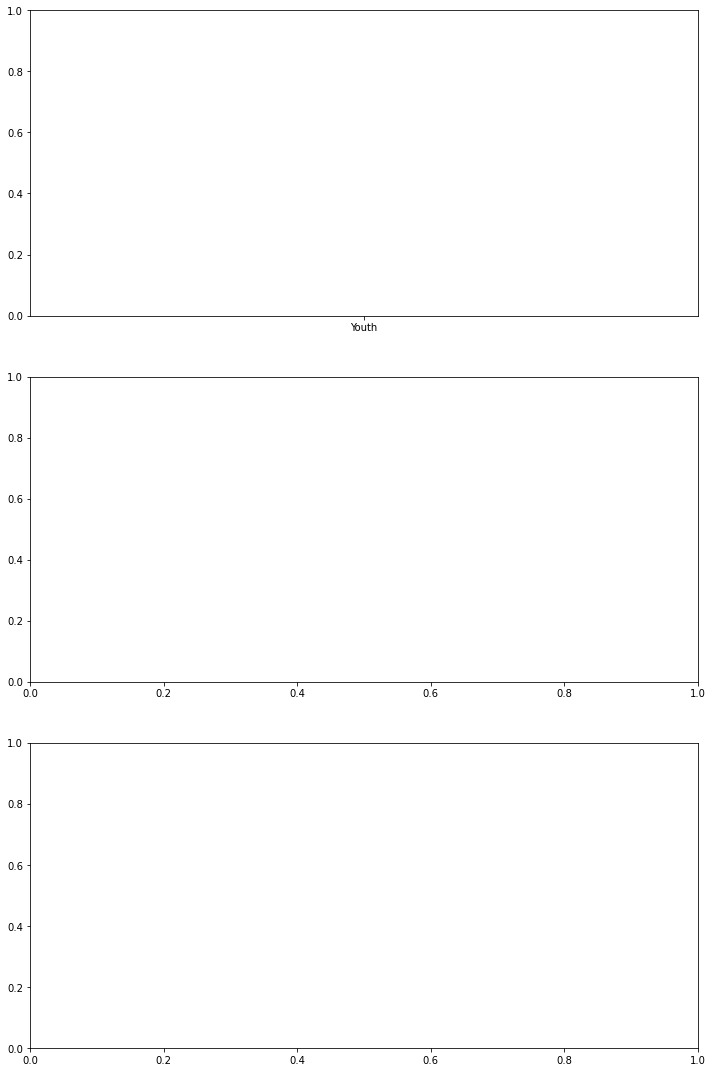

In [52]:
#Plot settings
fig, axes = plt.subplots(3, 1,figsize=(10,15))
fig.tight_layout(h_pad = 4.0)

#Recalled Visualization
graph_2 = sns.histplot(data = newRecalled, x="AgeGroup", hue = 'sentiment', hue_order = ['Positive','Negative'],multiple='dodge', stat = 'percent',common_norm=False,ax=axes[0])
for container in graph_2.containers:
    graph_2.bar_label(container)

graph_2.set(xlabel = 'Age Group')
axes[0].set_title('Recalled Sentiment', fontsize=20)

#Imagined Visualization
graph_2 = sns.histplot(data = newImagined, x="AgeGroup", hue = 'sentiment', hue_order = ['Positive','Negative'],multiple='dodge', stat = 'percent',common_norm=False,ax=axes[1])
for container in graph_2.containers:
    graph_2.bar_label(container)

graph_2.set(xlabel = 'Age Group')
axes[1].set_title('Imagined Sentiment', fontsize=20)

#Retold Visualization
graph_2 = sns.histplot(data = newRetold, x="AgeGroup", hue = 'sentiment', hue_order = ['Positive','Negative'],multiple='dodge', stat = 'percent',common_norm=False,ax=axes[2])
for container in graph_2.containers:
    graph_2.bar_label(container)

graph_2.set(xlabel = 'Age Group')
axes[2].set_title('Retold Sentiment', fontsize=20)

Sentimental Analysis between Retold vs. Recalled Stories

AttributeError: 'BarContainer' object has no attribute 'datavalues'

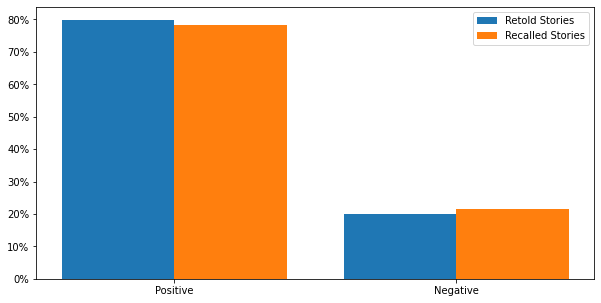

In [150]:
#select positive and negative sentiments (remove neutral sentiment)
posnegRetold = newRetold[(newRetold['sentiment'] == 'Positive') | (newRetold['sentiment'] == 'Negative')]
posnegRecalled = newRecalled[(newRecalled['sentiment'] == 'Positive') | (newRecalled['sentiment'] == 'Negative')]

#plot parameters
x = posnegRetold['sentiment']
y = posnegRecalled['sentiment']
fig, ax = plt.subplots(figsize=(10,5))
values, bins, patches = plt.hist([x, y], bins=np.arange(3)-0.5, label=['Retold Stories', 'Recalled Stories'],density=True)
 
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
for container in ax.containers:
    labels = [f'{x:.1%}' for x in container.datavalues]
    ax.bar_label(container, labels=labels)
plt.show()

Next, we will look at scatter plots from the spacy analysis

<AxesSubplot:xlabel='time since recalled', ylabel='spacy_sim'>

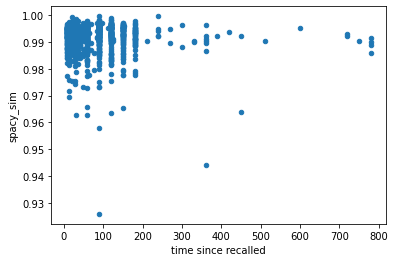

In [123]:
cleanedRecalledAndRetold.plot.scatter(x='time since recalled', y = 'spacy_sim')

<AxesSubplot:xlabel='time since recalled', ylabel='spacy_sim'>

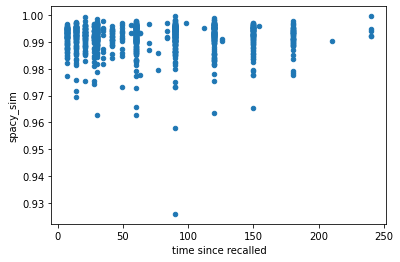

In [151]:
test = cleanedRecalledAndRetold[cleanedRecalledAndRetold['time since recalled'] < 250]
test.plot.scatter(x='time since recalled', y = 'spacy_sim')

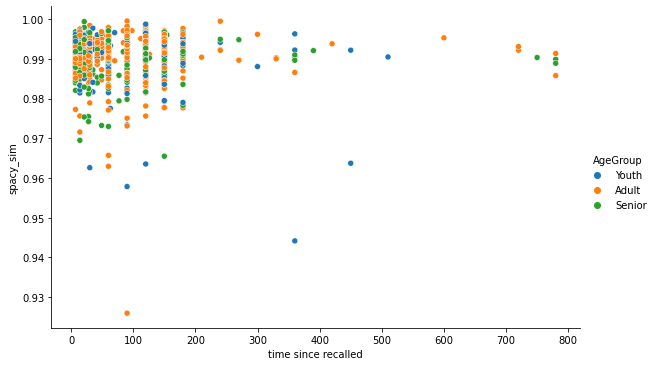

In [92]:
_ages = ['Youth','Adult','Senior']
sns.relplot(data=combinedAnalysis, x='time since recalled', y='spacy_sim', hue='AgeGroup', hue_order=_ages, aspect=1.61)
plt.show()

# III. Conclusion and Discussion

As states above we want to see how emtion affects memory so lets look into the results we got. First lets see if the emotion of our age group has increase or decreased over time.

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

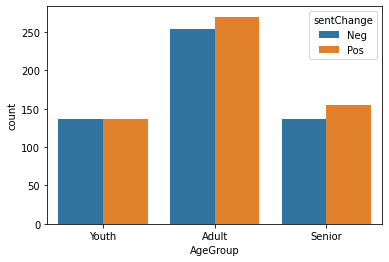

In [100]:
sns.countplot(x='AgeGroup',hue='sentChange',data=combinedAnalysis)

In [ ]:
sns.displot(penguins, x="flipper_length_mm")

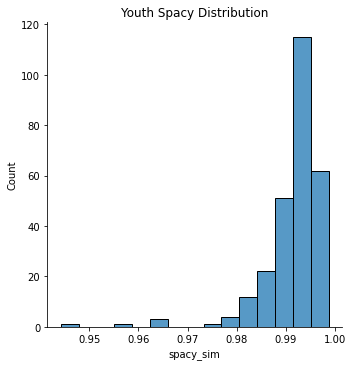

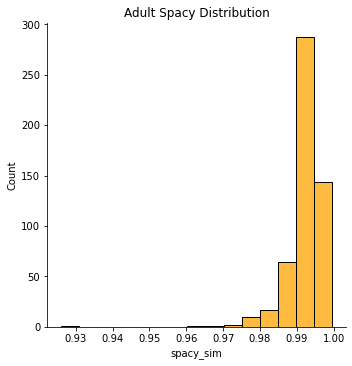

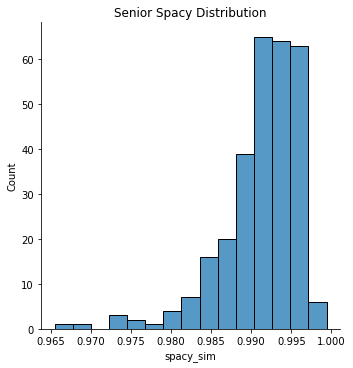

In [124]:
youth = sns.displot(youthOnly, x='spacy_sim',bins=15)
youth.set(title='Youth Spacy Distribution')
adult = sns.displot(adultOnly, x='spacy_sim',bins=15,color='orange')
adult.set(title='Adult Spacy Distribution')
senior = sns.displot(seniorOnly, x='spacy_sim',bins=15)
senior.set(title='Senior Spacy Distribution')

As we can see the emotion change was actually more positive over time in the Adult and Senior age group. As for the youth group the negative and positive emotion is about the same. Then looking at the distributions, the Adult distribution appears show the overall best retelling of the previous story, then Youth, and then finally Senior. This shows that even if there is better emotion it does not necessarily lead to better memory. If emotion were to help memory we would see the Senior distrubition being the best followed by Adult and then finally Youth.

Next lets look at the emotion variables that might be driving this increase. We decided that the variables that speak the most about emtion are:
- Draining which describes how emtionally drained the individual was when telling the story
- Importance which decribes how driven the individual was when telling the story
- Stressful which describes how stressed the individual was when telling the story

In [125]:
newRecalled.groupby('AgeGroup').mean().drop(columns=['annotatorAge','frequency','logTimeSinceEvent',
                                                   'similarity','timeSinceEvent','distracted'])

,draining,importance,stressful
AgeGroup,,,
Adult,2.337594,4.480451,2.339850
Senior,2.506897,4.653448,2.475862
Youth,2.303488,4.472093,2.293023


In [126]:
newRetold.groupby('AgeGroup').mean().drop(columns=['annotatorAge','frequency','logTimeSinceEvent',
                                                   'similarity','timeSinceEvent','distracted'])

,draining,importance,stressful
AgeGroup,,,
Adult,2.126739,4.268934,2.128284
Senior,2.285294,4.491176,2.200000
Youth,1.975460,4.168712,2.015337


These three emotional variables are done on a Likert scale, meaning 5 is the most stress 3 is neutal amount of stress and 1 is no stress at all. As we can see the individuals on average were less emtionally drained during the retelling of the story, the average importance level decreased for each age group, and the stress decresed for each age group

We can also look at violon plots to help us better see the distribution of the emotions by age group

[Text(0.5, 1.0, 'Recalled Stress Distribution')]

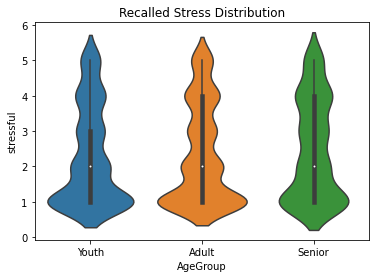

In [131]:
stressRec = sns.violinplot(x='AgeGroup',data=newRecalled,
            y='stressful')
stressRec.set(title='Recalled Stress Distribution')

[Text(0.5, 1.0, 'Retold Stress Distribution')]

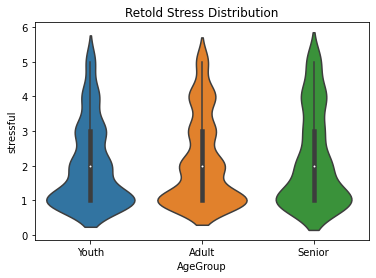

In [130]:
stressRet = sns.violinplot(x='AgeGroup',data=newRetold,
            y='stressful')
stressRet.set(title='Retold Stress Distribution')

We can see that the stress distribution thinned out at 6 and increase from 2 - 3

[Text(0.5, 1.0, 'Recalled Importance Distribution')]

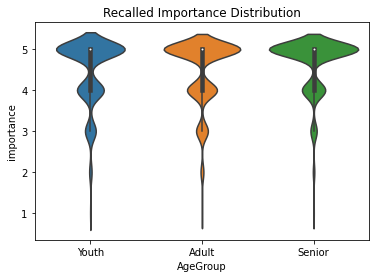

In [136]:
importanceRec = sns.violinplot(x='AgeGroup',data=newRecalled,
            y='importance')
importanceRec.set(title='Recalled Importance Distribution')

[Text(0.5, 1.0, 'Retold Importance Distribution')]

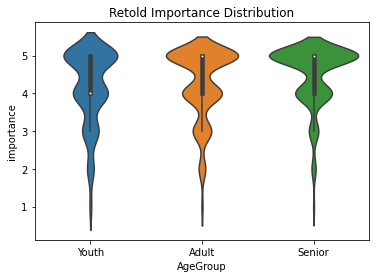

In [137]:
importanceRet = sns.violinplot(x='AgeGroup',data=newRetold,
            y='importance')
importanceRet.set(title='Retold Importance Distribution')

We can see the importance distribution filled in the thinner spots and grew more from 4 to 2

[Text(0.5, 1.0, 'Recalled Draining Distribution')]

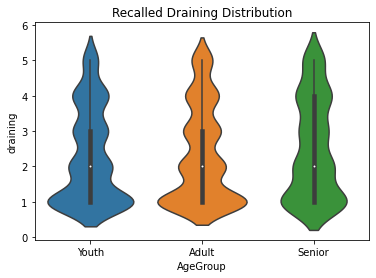

In [134]:
drainingRec = sns.violinplot(x='AgeGroup',data=newRecalled,
            y='draining')
drainingRec.set(title='Recalled Draining Distribution')

[Text(0.5, 1.0, 'Retold Draining Distribution')]

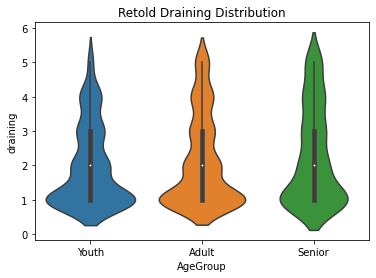

In [135]:
drainingRet = sns.violinplot(x='AgeGroup',data=newRetold,
            y='draining')
drainingRet.set(title='Retold Draining Distribution')

We can see that draining followed a similar pattern as stressed did

### Overall
We can 

In [126]:
#Conclusion
#Discussion of your results and how they address your experimental question
#Limitations of analysis discussed
#What additional experiments would be interesting, and what data would you need?